Single Star with Spots
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_star()

Adding Spots
---------------------

Let's add one spot to our star.  Since there is only one star, the spot will automatically attach without needing to provide component (as is needed in the [binary with spots example](./binary_spots)

In [2]:
b.add_spot(radius=30, colat=80, long=0, relteff=0.9)

<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

Spot Parameters
-----------------

A spot is defined by the colatitude and longitude of its center, its angular radius, and the ratio of temperature of the spot to the local intrinsic value.

In [3]:
print b['spot']

ParameterSet: 4 parameters
            colat@spot01@feature: 80.0 deg
             long@spot01@feature: 0.0 deg
           radius@spot01@feature: 30.0 deg
          relteff@spot01@feature: 0.9


The 'colat' parameter defines the colatitude on the star measured from its North (spin) Pole.  The 'long' parameter measures the longitude of the spot - with longitude = 0 being defined as pointing towards the observer at t0 for a single star.  See the [spots tutorial](../tutorials/spots.ipynb) for more details.

In [4]:
times = np.linspace(0, 10, 11)
b.set_value('period', 10)
b.add_dataset('mesh', times=times, columns=['teffs'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [5]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

<ParameterSet: 34 parameters | qualifiers: xyz_elements, uvw_elements, teffs, times>

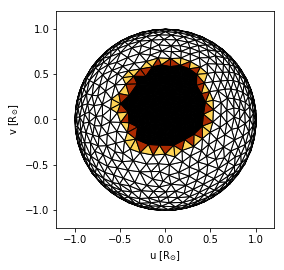

In [6]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                      animate=True, save='single_spots_1.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_1.gif)

If we set t0 to 5 instead of zero, then the spot will cross the line-of-sight at t=5 (since the spot's longitude is 0).

In [7]:
b.set_value('t0', 5)

In [8]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

Mon, 15 Oct 2018 17:38 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 34 parameters | qualifiers: xyz_elements, uvw_elements, teffs, times>

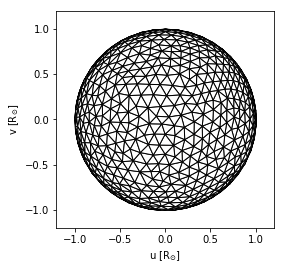

In [9]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                     animate=True, save='single_spots_2.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_2.gif)

And if we change the inclination to 0, we'll be looking at the north pole of the star.  This clearly illustrates the right-handed rotation of the star.  At time=t0=5 the spot will now be pointing in the negative y-direction.

In [10]:
b.set_value('incl', 0)

In [11]:
b.run_compute(distortion_method='rotstar', irrad_method='none')

Mon, 15 Oct 2018 17:38 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 34 parameters | qualifiers: xyz_elements, uvw_elements, teffs, times>

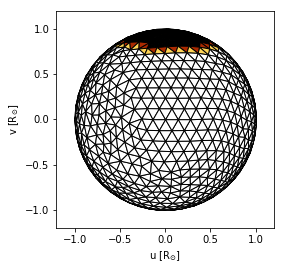

In [12]:
afig, mplfig = b.plot(x='us', y='vs', fc='teffs', 
                     animate=True, save='single_spots_3.gif', save_kwargs={'writer': 'imagemagick'})

![animation](single_spots_3.gif)